In [30]:
from sympy import var,Function,Symbol
from ComputabilityGraphs.CMTVS import CMTVS
from bgc_md2.helper import bgc_md2_computers
from bgc_md2.resolve.mvars import (
    InFluxesBySymbol,
    OutFluxesBySymbol,
    InternalFluxesBySymbol,
    TimeSymbol,
    StateVariableTuple,
)

In [106]:
#define all the symbols you are going to use in the equations
sym_dict={
    "AGLIVC": "Above ground live grass C pool ",
    "BGLIVC": "Below ground live grass root C pool ",
    "STDEDC": "Standing dead C pool ", 
    "STRUCC_1": "Surface structural C pool",
    "STRUCC_2": "Below ground structural C pool",
    "SOM1C1": "Surface microbe C pool",
    "SOM1C2": "Active organic C pool",
    "SOM2C": "Slow organic C pool",
    "SOM3C": "Passive soil organic matter C pool",
    "cultra4": "fraction of standing dead C to surface litter", 
    "cultra1": "fraction of above ground live C transferred to standing dead", 
    "METABC_1": "Surface metabolic C ",
    "METABC_2": "Below ground metabolic C ",
    "cprodc_A": "fraction of Gpp that goes to the above ground part",
    "cprodc_B": "fraction of Gpp that goes to the below ground part",
    "r_leaf2out": "",
    "r_wood2out": "",
}
for k in sym_dict.keys():
    code=k+" = Symbol('{0}')".format(k)
    exec(code)
    
func_dict = {
    "Gpp_grass": "Total C production for grass in g/m^2*month FIXME"
}
for k in func_dict.keys():
    code=k+" = Function('{0}')".format(k)
    exec(code)

cprodc_B = 1 - cprodc_A
    
    
#I_wood=Function("I_wood") 
t=TimeSymbol("t") # the symbol used for time since it has a special role

# formulate the model
mvs = CMTVS(
    {
        StateVariableTuple( # the pool names in your preferred order
            (
                AGLIVC,
                BGLIVC,
                STDEDC,
                STRUCC_1,
                STRUCC_2,
                SOM1C1,
                SOM1C2,
                SOM2C,
                SOM3C,
                METABC_1,
                METABC_2,
            )
        ), 
        t, 
        InFluxesBySymbol({
            AGLIVC: Gpp_grass(t)*cprodc_A, 
            BGLIVC: Gpp_grass(t)*cprodc_B
        }),
        OutFluxesBySymbol({
            STDEDC: r_leaf2out * STDEDC,
            STRUCC_1: r_wood2out * STRUCC_1
        }),
        InternalFluxesBySymbol({
            (AGLIVC, STDEDC): cultra1* AGLIVC, 
            (STDEDC, STRUCC_1): cultra4* STDEDC, 
            #(STRUCC_1, C_leaf): k_wood2leaf * STRUCC
        }),
    },
    bgc_md2_computers()

)

In [107]:
#start to query the model description..
M=mvs.get_CompartmentalMatrix()
#M.inverse_LU()

In [108]:
mvs.get_InputTuple()

Matrix([
[      cprodc_A*Gpp_grass(t)],
[(1 - cprodc_A)*Gpp_grass(t)],
[                          0],
[                          0],
[                          0],
[                          0],
[                          0],
[                          0],
[                          0],
[                          0],
[                          0]])

In [109]:
mvs.get_StateVariableTuple()

Matrix([
[  AGLIVC],
[  BGLIVC],
[  STDEDC],
[STRUCC_1],
[STRUCC_2],
[  SOM1C1],
[  SOM1C2],
[   SOM2C],
[   SOM3C],
[METABC_1],
[METABC_2]])

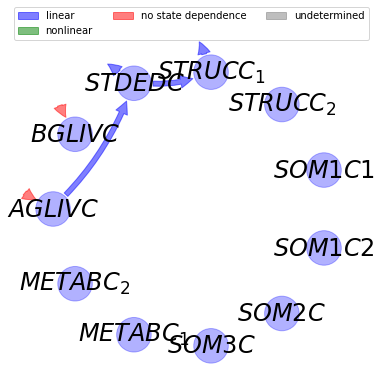

In [110]:
from bgc_md2.helper import compartmental_graph
compartmental_graph(mvs)

In [111]:
from bgc_md2.display_helpers import mass_balance_equation
mass_balance_equation(mvs)

<IPython.core.display.Math object>

In [ ]:
# for comparison the century model as found in our database
from bgc_md2.models.Parton1987SoilSciSocAmJ.source_by_name import mvs as mvs_century

In [99]:
mvs.computable_mvar_types

<bound method CMTVS.computable_mvar_types of CMTVS({InternalFluxesBySymbol = InternalFluxesBySymbol({(AGLIVC, STDEDC): AGLIVC*cultra1, (STDEDC, STRUCC_1): STDEDC*cultra4}), StateVariableTuple = Matrix([[AGLIVC], [BGLIVC], [STDEDC], [STRUCC_1], [STRUCC_2], [METABC_1]]), OutFluxesBySymbol = OutFluxesBySymbol({STDEDC: STDEDC*r_leaf2out, STRUCC_1: STRUCC_1*r_wood2out}), InFluxesBySymbol = InFluxesBySymbol({AGLIVC: cprodc_A*Gpp_grass(t), BGLIVC: (1 - cprodc_A)*Gpp_grass(t)}), TimeSymbol = t})>

In [ ]:
mvs_century.get_InputTuple()

In [ ]:
compartmental_graph(mvs_century)

In [ ]:
BI=mvs_century.get_BibInfo()
BI.sym_dict

In [51]:
x=Symbol("x")

In [53]:

s=x**2-x

s

x**2 - x

In [54]:
type(s)

sympy.core.add.Add

In [46]:
a


5